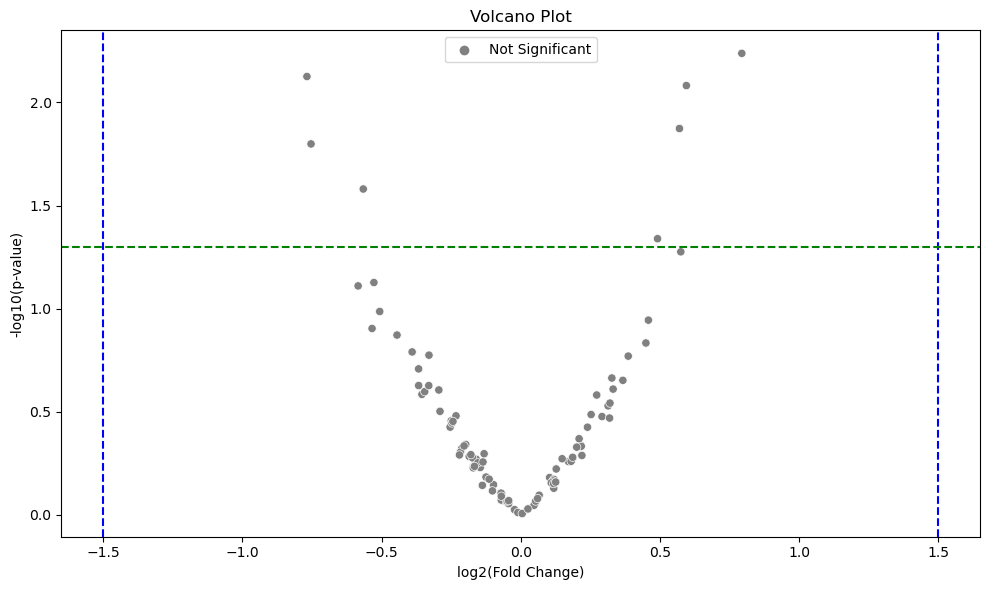

In [5]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Step 2: Load data
data = pd.read_csv('cancer_expression.csv')  # Replace with your actual file path

# Step 3: Define control and treatment columns
control_cols = [col for col in data.columns if 'Control' in col]
treatment_cols = [col for col in data.columns if 'Treatment' in col]

# Step 4: Calculate mean expression
data['mean_control'] = data[control_cols].mean(axis=1)
data['mean_treatment'] = data[treatment_cols].mean(axis=1)

# Step 5: Calculate log2 fold change
data['log2FoldChange'] = np.log2(data['mean_treatment'] + 1e-6) - np.log2(data['mean_control'] + 1e-6)

# Step 6: Perform t-test
ttest_results = ttest_ind(data[treatment_cols], data[control_cols], axis=1, equal_var=False)
data['pvalue'] = ttest_results.pvalue
data['-log10(pvalue)'] = -np.log10(data['pvalue'])

# Step 7: Classify significance
fold_change_threshold = 1.5
pvalue_threshold = 0.05
data['significance'] = 'Not Significant'
data.loc[
    (abs(data['log2FoldChange']) > fold_change_threshold) & 
    (data['pvalue'] < pvalue_threshold), 
    'significance'
] = 'Significant'

# Step 8: Plot volcano
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x='log2FoldChange', 
    y='-log10(pvalue)', 
    hue='significance', 
    palette={'Significant': 'red', 'Not Significant': 'gray'}
)
plt.axvline(x=fold_change_threshold, color='blue', linestyle='--')
plt.axvline(x=-fold_change_threshold, color='blue', linestyle='--')
plt.axhline(y=-np.log10(pvalue_threshold), color='green', linestyle='--')
plt.title('Volcano Plot')
plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
#heatmap

heatmap_data=data.set_index('Gene')
heatmap=heatmap_data.head(10)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap,cmap="coolwarm",annot=True)
plt.title("Heatmap of Gene Expression level")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.show()

ValueError: could not convert string to float: 'Not Significant'

<Figure size 1200x800 with 0 Axes>